In [176]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import calendar
import datetime as dt
from datetime import datetime
from scipy import stats

import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Read data from the csv file
df_bike = pd.read_csv("C:/Users/j1016649/Documents/Bike/hour.csv")

In [3]:
# Check the rows and columns
df_bike.shape

(17379, 17)

In [4]:
# Check the first few rows
df_bike.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Let us the check the unique count of values in each column
# We can see that the dataset has 4 unique seasons, 2 unique years, 12 unique months, 24 unique hours and so on.
# We will investigate further to see these unique values.

df_bike.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [6]:
# Let us check the summary dataset stats
#Few things we can note from the stats are:
#1. Casual User's count is more volatile than registered users and presumably, because of casual users, there may be 
# an increase in variability of overall cnt data.
#2. There seems to be high outliers for both the users.
#3. We can notice 0 value for humidity and windspeed. Ideally humidity and windspeed shouldn't be zero
df_bike.describe().round(2)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379.00,17379.0,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,8690.00,2.50,0.5,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,5017.03,1.11,0.5,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,2.00,0.0,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,3.00,1.0,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,3.00,1.0,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,17379.00,4.00,1.0,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00


In [7]:
#There are no missing values for all the columns. However, we need to do the sanity check to find out unexpected values 
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.2+ MB


In [8]:
#Let us to do some sanity check on dates
#We have months in the range of 01 to 12 which looks correct

pd.to_datetime(df_bike['dteday']).apply(lambda x: dt.datetime.strftime(x,'%m')).unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [9]:
#Data is provided only for 2 years 2011 & 2012 which is fine

pd.to_datetime(df_bike['dteday']).apply(lambda x: dt.datetime.strftime(x,'%Y')).unique()

array(['2011', '2012'], dtype=object)

In [10]:
#Daily data contains data for 01 to 31 days. No problem here 

pd.to_datetime(df_bike['dteday']).apply(lambda x: dt.datetime.strftime(x,'%d')).unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [11]:
# create a datetime index
df_bike.dteday = pd.to_datetime(df_bike.dteday)
df_bike.set_index('dteday', inplace=True)

In [12]:
df_bike["season"] = df_bike.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

In [13]:
df_bike["weathersit"]=df_bike.weathersit.map({1: "Clear + Few clouds", 
                                            2 : "Mist + Cloudy, Mist",
3 : "Light Snow+ Rain + storm",
4 : "Heavy Rain + Ice + ST"})

In [14]:
df_bike.head(5)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,Spring,0,1,0,0,6,0,Clear + Few clouds,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,2,Spring,0,1,1,0,6,0,Clear + Few clouds,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,3,Spring,0,1,2,0,6,0,Clear + Few clouds,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01,4,Spring,0,1,3,0,6,0,Clear + Few clouds,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01,5,Spring,0,1,4,0,6,0,Clear + Few clouds,0.24,0.2879,0.75,0.0,0,1,1


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Weather'),
 Text(0.5, 1.0, 'Weather Histogram')]

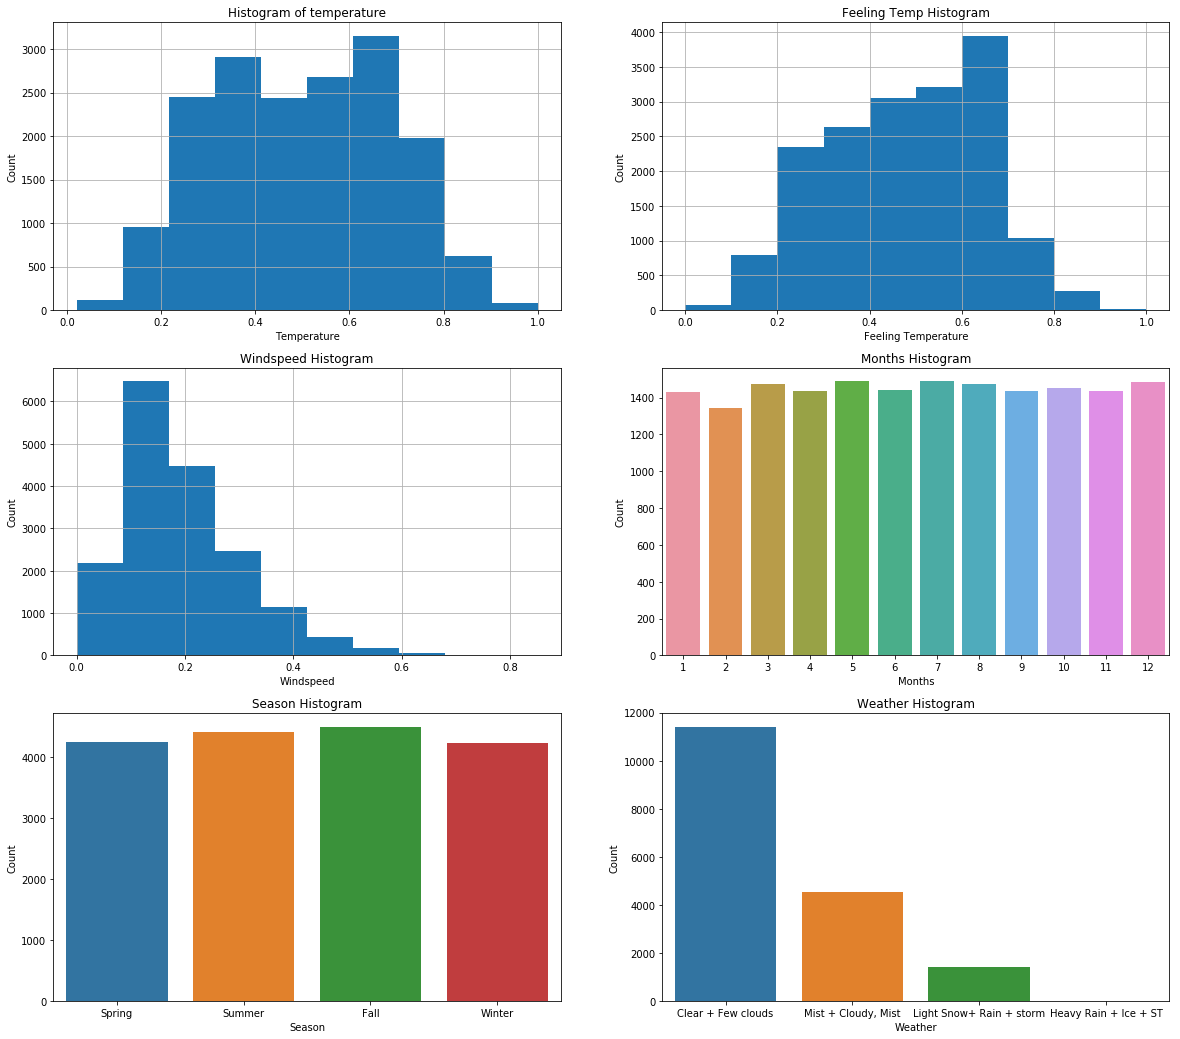

In [15]:
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,18)
df_bike['temp'].hist(ax=axes[0,0])
df_bike['atemp'].hist(ax=axes[0,1])
df_bike['windspeed'].hist(ax=axes[1,0])
sns.countplot(x='mnth',data=df_bike, ax=axes[1,1])
sns.countplot(x='season',data=df_bike, ax=axes[2,0])
sns.countplot(x='weathersit', data=df_bike, ax=axes[2,1])


axes[0,0].set(ylabel="Count", xlabel="Temperature",title="Histogram of temperature")
axes[0,1].set(ylabel="Count", xlabel="Feeling Temperature", Title="Feeling Temp Histogram")
axes[1,0].set(ylabel="Count", xlabel="Windspeed", Title="Windspeed Histogram")
axes[1,1].set(ylabel="Count", xlabel="Months", Title="Months Histogram")
axes[2,0].set(ylabel="Count", xlabel="Season", Title="Season Histogram")
axes[2,1].set(ylabel="Count", xlabel="Weather", Title="Weather Histogram")

[Text(0, 0.5, 'cnt'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

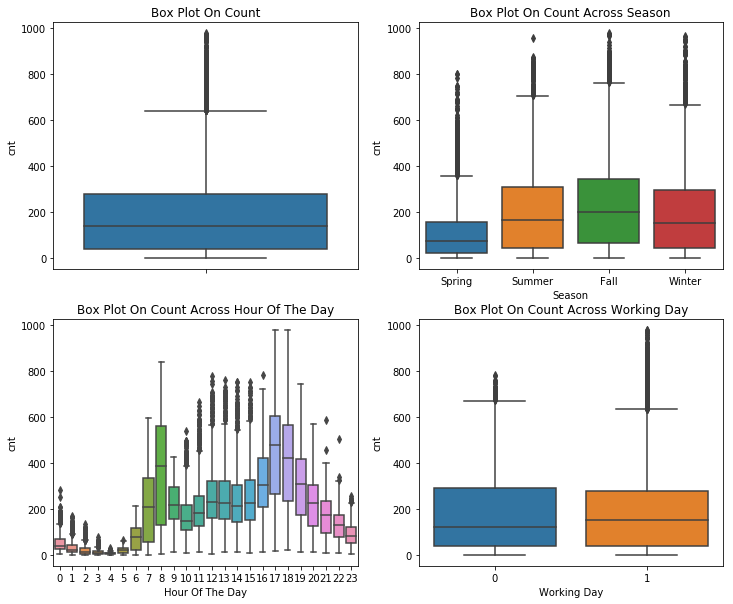

In [16]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=df_bike,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=df_bike,y="cnt",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df_bike,y="cnt",x="hr",orient="v",ax=axes[1][0])
sns.boxplot(data=df_bike,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='cnt',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='cnt',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='cnt',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='cnt',title="Box Plot On Count Across Working Day")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Season'),
 Text(0.5, 1.0, 'Box Plot Total Riders')]

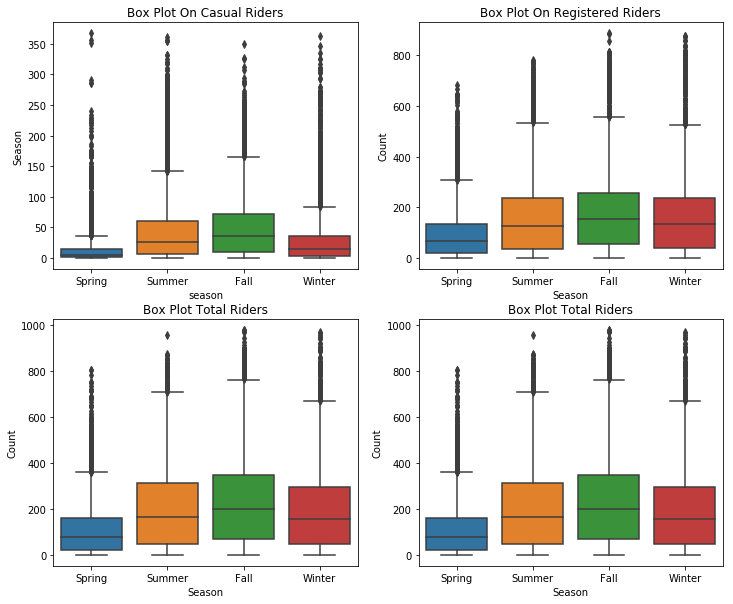

In [17]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=df_bike,y="casual",x="season", orient="v",ax=axes[0][0])
sns.boxplot(data=df_bike,y="registered",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df_bike,y="cnt",x="season",orient="v",ax=axes[1][0])
sns.boxplot(data=df_bike,y="cnt",x="season",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Season',title="Box Plot On Casual Riders")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Registered Riders")
axes[1][0].set(xlabel='Season', ylabel='Count',title="Box Plot Total Riders")
axes[1][1].set(xlabel='Season', ylabel='Count',title="Box Plot Total Riders")

In [18]:
df_test1=df_bike.groupby(['season'])['casual','registered','cnt'].sum().reset_index()
df_test1["Casual%"]=df_test1["casual"]*100/df_test1["cnt"]
df_test1

#Below results show that number of casual users increase in Fall & Summer and drops in Spring & Winter 

,season,casual,registered,cnt,Casual%
0,Fall,226091,835038,1061129,21.306646
1,Spring,60622,410726,471348,12.861410
2,Summer,203522,715067,918589,22.155937
3,Winter,129782,711831,841613,15.420627


[Text(0, 0.5, 'Total Ribers Count'),
 Text(0.5, 0, 'Hours'),
 Text(0.5, 1.0, 'Total Riders - Box Plot')]

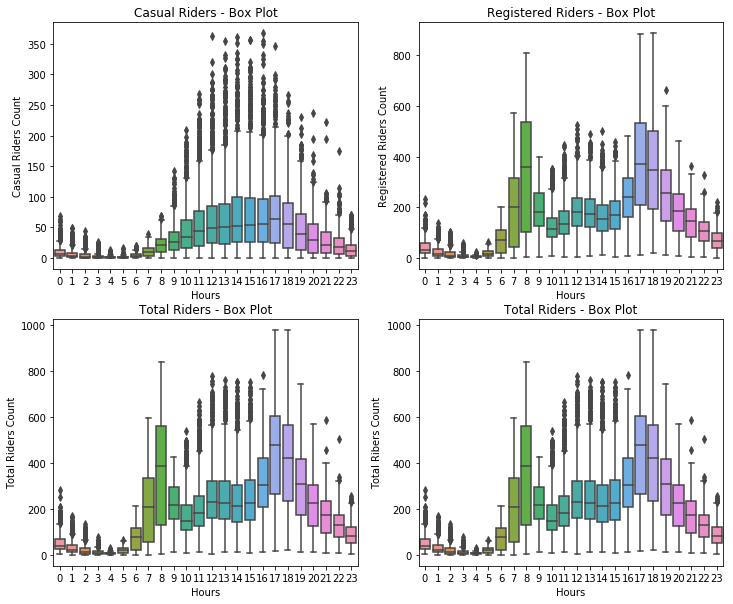

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=df_bike, y="casual", x="hr", orient="v", ax=axes[0][0])
sns.boxplot(data=df_bike, y="registered", x="hr", orient="v", ax=axes[0][1])
sns.boxplot(data=df_bike, y="cnt", x="hr", orient="v", ax=axes[1][0])
sns.boxplot(data=df_bike, y="cnt", x="hr", orient="v", ax=axes[1][1])

axes[0][0].set( xlabel='Hours',ylabel='Casual Riders Count' ,title="Casual Riders - Box Plot")
axes[0][1].set(xlabel='Hours', ylabel='Registered Riders Count' ,title="Registered Riders - Box Plot")
axes[1][0].set(xlabel='Hours', ylabel='Total Riders Count', title="Total Riders - Box Plot")
axes[1][1].set(xlabel='Hours', ylabel='Total Ribers Count', title="Total Riders - Box Plot")


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot Total Riders')]

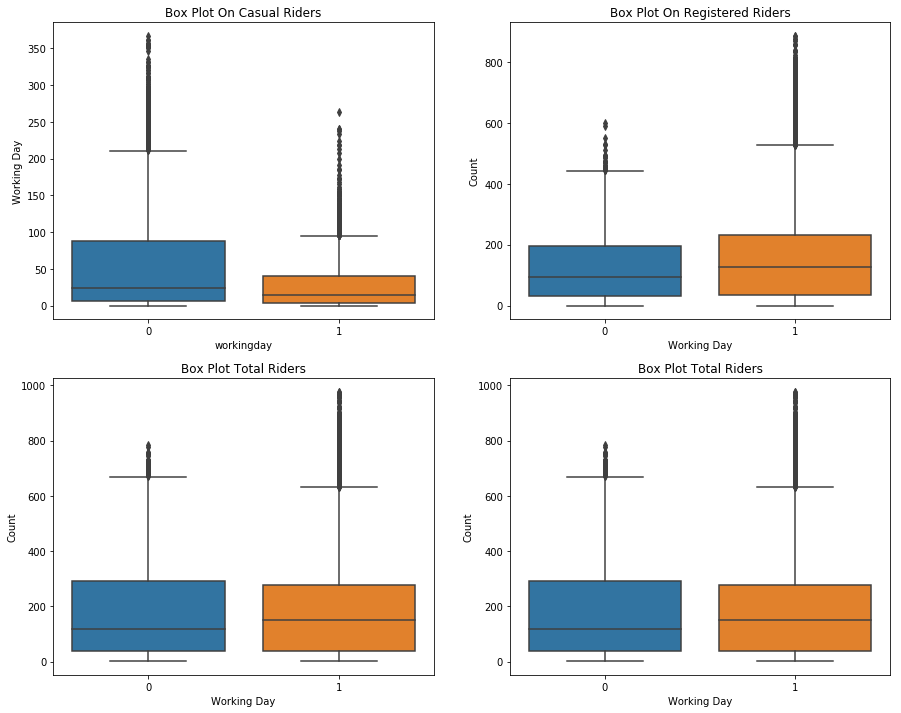

In [20]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15, 12)
sns.boxplot(data=df_bike,y="casual",x="workingday", orient="v",ax=axes[0][0])
sns.boxplot(data=df_bike,y="registered",x="workingday",orient="v",ax=axes[0][1])
sns.boxplot(data=df_bike,y="cnt",x="workingday",orient="v",ax=axes[1][0])
sns.boxplot(data=df_bike,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Working Day',title="Box Plot On Casual Riders")
axes[0][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Registered Riders")
axes[1][0].set(xlabel='Working Day', ylabel='Count',title="Box Plot Total Riders")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot Total Riders")

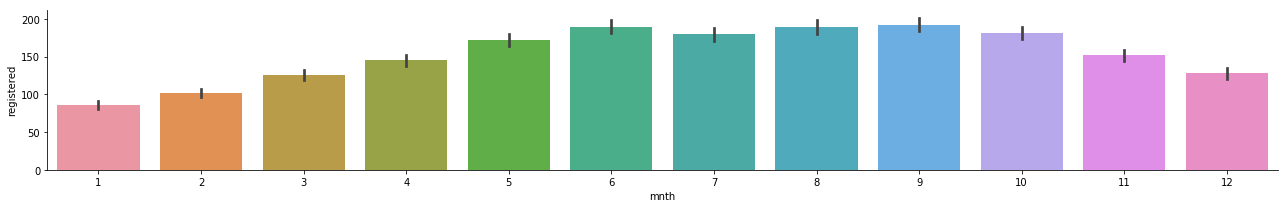

In [21]:
sns.catplot(x='mnth', y='registered', data=df_bike, kind='bar', height=3,aspect=6)

In [22]:
# df_bike['mnth'].head(2)
# tuple(df_bike['mnth'])


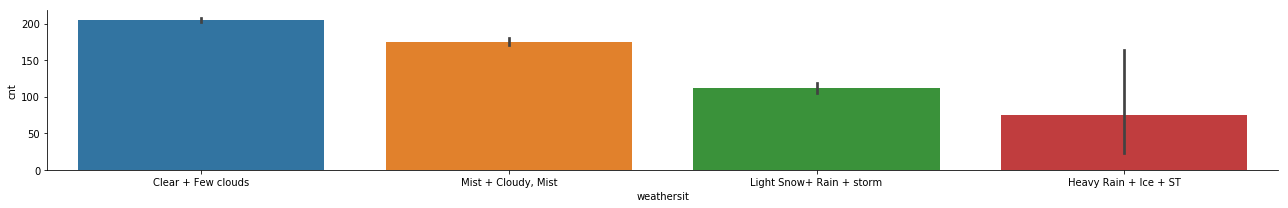

In [23]:
sns.catplot(x='weathersit', y='cnt', data=df_bike, kind='bar', height=3,aspect=6)

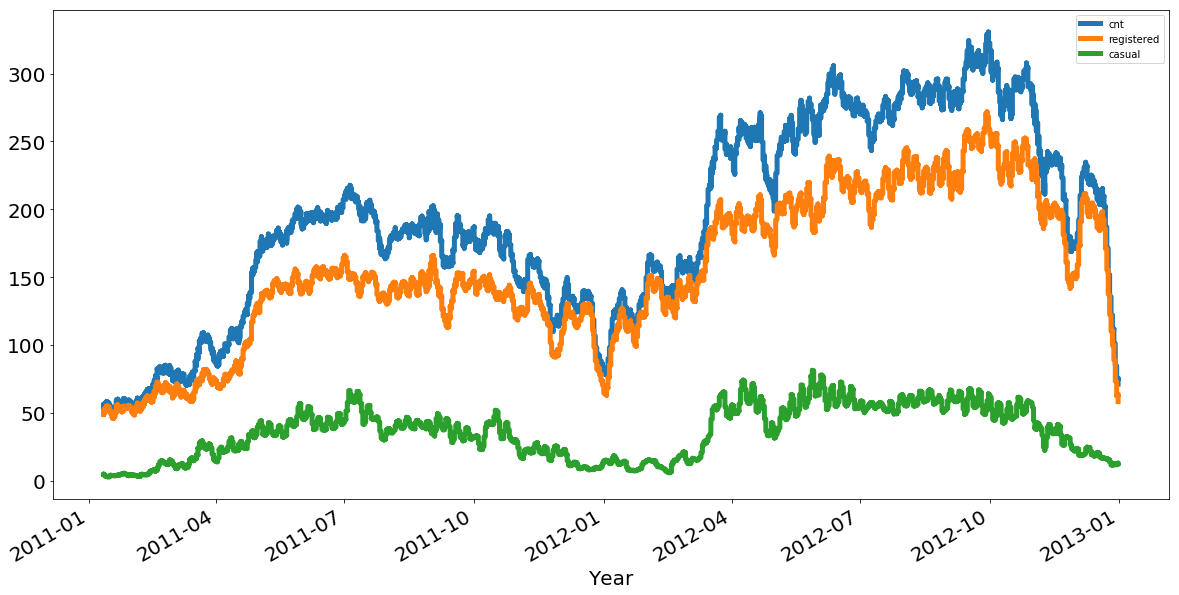

In [24]:
pd.concat([df_bike.cnt.rolling(240).mean(), df_bike.registered.rolling(240).mean(), df_bike.casual.rolling(240).mean()], axis=1).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [25]:
# import numpy as np
# from sklearn.model_selection import train_test_split

# train1,test1 = train_test_split(df_train, shuffle=1)

# print(train1.shape, test1.shape, df_train.shape)

In [26]:
# fig, axes = plt.subplots(nrows=2, ncols=2)
# fig.set_size_inches(12,7)

# train1['cnt'].hist(ax=axes[0,0])
# test1['cnt'].hist(ax=axes[0,1])
# df_train['cnt'].hist(ax=axes[1,0])

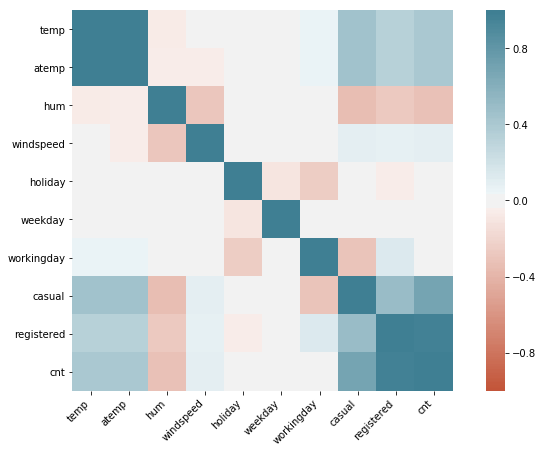

In [27]:
# Let's calculate the correlation between independent variables and dependent variables

fig, axes=plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12,7)

corr = df_bike[['temp','atemp', 'hum', 'windspeed','holiday', 'weekday','workingday','casual','registered','cnt']].corr()
# corr = df_train.corr()
    
ax = sns.heatmap(
corr, 
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 220, n=200),
square=True
)
    
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [28]:
# We can see notice that atemp and temp are highly correlated to each other and we can drop one of them
# Secondly, in terms of casual and registered and total(cnt) users, lets take the total users. 
# We could have forecasted them separately for different business needs.
#Humidity has negative correlation
#Temperature has positive correlation
# Windspeed has negligible positive correlation

In [29]:
corr

,temp,atemp,hum,windspeed,holiday,weekday,workingday,casual,registered,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,-0.027340,-0.001795,0.055390,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,-0.030973,-0.008821,0.054667,0.454080,0.332559,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.010588,-0.037158,0.015688,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.003988,0.011502,-0.011830,0.090287,0.082321,0.093234
holiday,-0.027340,-0.030973,-0.010588,0.003988,1.000000,-0.102088,-0.252471,0.031564,-0.047345,-0.030927
weekday,-0.001795,-0.008821,-0.037158,0.011502,-0.102088,1.000000,0.035955,0.032721,0.021578,0.026900
workingday,0.055390,0.054667,0.015688,-0.011830,-0.252471,0.035955,1.000000,-0.300942,0.134326,0.030284
casual,0.459616,0.454080,-0.347028,0.090287,0.031564,0.032721,-0.300942,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,-0.047345,0.021578,0.134326,0.506618,1.000000,0.972151
cnt,0.404772,0.400929,-0.322911,0.093234,-0.030927,0.026900,0.030284,0.694564,0.972151,1.000000


In [30]:
# Let us remove the outliers from the dataset by filtering outliers value for variable cnt
df_cleansed = pd.read_csv("C:/Users/j1016649/Documents/Bike/hour.csv")

df_cleansed = df_cleansed[np.abs(df_cleansed["cnt"]-df_cleansed["cnt"].mean())<=(3*df_cleansed["cnt"].std())].copy() 

In [31]:
# 244 records were removed as outliers

print('Cleansed dataset :',df_cleansed.shape,'\n','Original Dataset:',df_bike.shape)

Cleansed dataset : (17135, 17) 
 Original Dataset: (17379, 16)


## Compare different transformations

[Text(0.5, 1.0, 'box-cox transformation')]

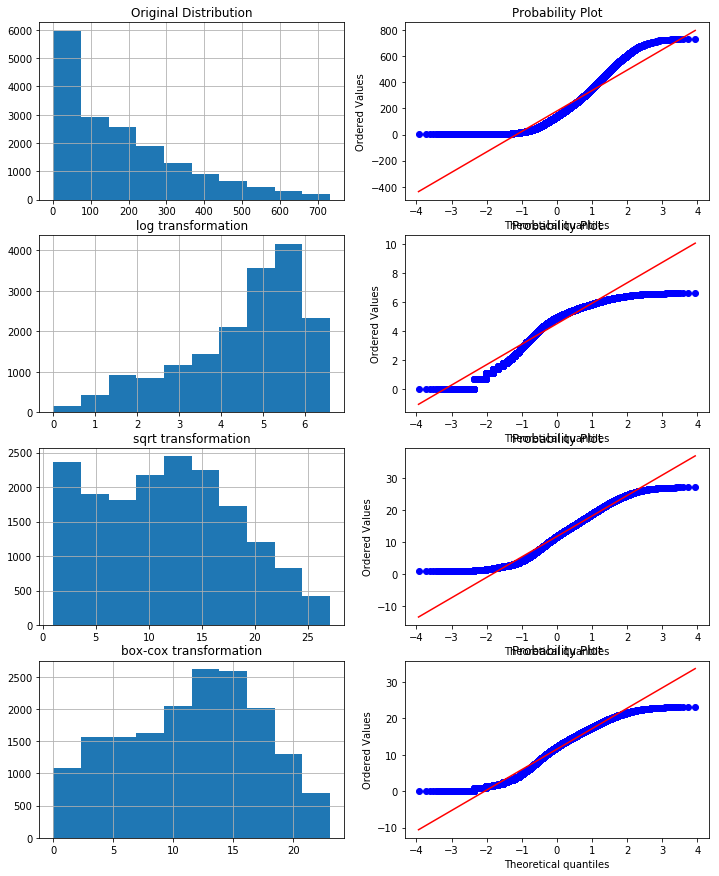

In [32]:
#As we had seen earlier that the distribution of the data is not normal, 
#we need to transform the data and find the best distribution so that we can apply the model


fig, axes=plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(12,15)

# How is the distribution for x?
pd.Series(df_cleansed['cnt']).hist(ax=axes[0,0])
stats.probplot(df_cleansed['cnt'], dist="norm", plot=axes[0,1])


# What happens when log transformation?
pd.Series(np.log(df_cleansed['cnt'])).hist(ax=axes[1,0])
stats.probplot(np.log(df_cleansed['cnt']), dist="norm", plot=axes[1,1])


# What happens when sqrt transformation?
pd.Series(np.sqrt(df_cleansed['cnt'])).hist(ax=axes[2,0])
stats.probplot(np.sqrt(df_cleansed['cnt']), dist="norm", plot=axes[2,1])

# Now what happens when box-cox transformation?
x_bc, lmda = stats.boxcox(df_cleansed['cnt'])
pd.Series(x_bc).hist(ax=axes[3,0])
stats.probplot(x_bc, dist="norm", plot=axes[3,1])

axes[0,0].set(title='Original Distribution')
axes[1,0].set(title='log transformation')
axes[2,0].set(title='sqrt transformation')
axes[3,0].set(title='box-cox transformation')


#### From the above transformations, it is apparent that box-cox transformation gives the best fitting for normal distribution.

In [33]:
# Combine and sort Date and time so that we can predict the values for each Day + Hours

df_cleansed['Date'] = df_cleansed.index.sort_values(ascending=True)

df_cleansed["Date"]=pd.to_datetime((df_cleansed.Date) + pd.to_timedelta(pd.to_numeric(df_cleansed.hr), unit='h'))

df_cleansed.Date.apply(lambda dateString : datetime.strftime(dateString,'%m/%d/%Y'))

                
df_cleansed.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Date
0,1,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1970-01-01 00:00:00.000000000
1,2,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1970-01-01 01:00:00.000000001


## Function to calculate mean absolute deviation 

In [34]:
def MAD_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) ))

In [35]:
cat_var = ['season','hr', 'yr','mnth', 'holiday', 'weekday','workingday','weathersit']

for x in cat_var:
           df_cleansed[x] = df_cleansed[x].astype("category")

In [96]:
import numpy as np
from sklearn.model_selection import train_test_split

train1,test1 = train_test_split(df_cleansed, shuffle=1)

train1=train1.sort_values(by=["Date"])

test1=test1.sort_values(by=["Date"])

train1.reset_index(drop=True, inplace=True)
test1.reset_index(drop=True, inplace=True)

print(train1.shape, test1.shape, df_cleansed.shape)

(12851, 18) (4284, 18) (17135, 18)


### Change "Count" values to Box-Cox Transformation as the distribution is not normal

In [97]:
train1['cnt'], fitted_lambda  = stats.boxcox(train1['cnt'])

test1['cnt'], fitted_lambda  = stats.boxcox(test1['cnt'])

# Get the value to train the model
y_train = train1["cnt"]
y_test = test1["cnt"]

In [98]:
num_var=['cnt','casual','registered','Date', 'instant', 'dteday']


train1  = train1.drop(num_var,axis=1)
test1  = test1.drop(num_var,axis=1)

## Inverse Box-Cox function 

In [39]:
#Function

def invboxcox(y):
       if fitted_lambda == 0:
        return(np.exp(y))
       else:
        return(np.exp(np.log(fitted_lambda*y+1)/fitted_lambda))


# Test the code
x=[100]
ld = fitted_lambda
y = stats.boxcox(x,ld)
print(invboxcox(y[0]))

100.00000000000004


## Linear Regression Model

In [99]:
from sklearn.linear_model import LinearRegression


# Initialize logistic regression model
Reg_Model = LinearRegression()

# Train the model

Reg_Model.fit(X = train1,y = y_train)

# Make predictions
preds = Reg_Model.predict(X= train1)
print ("MAD Value For Linear Regression: ",MAD_error(invboxcox(y_train),invboxcox(preds)))

MAD Value For Linear Regression:  85.91134258278893


In [41]:
train1.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,1,0,1,0,0,0,0,2,0.46,0.4545,0.88,0.2985
2,1,0,1,0,0,1,1,1,0.22,0.1970,0.44,0.3582
3,1,0,1,0,0,2,1,1,0.16,0.1818,0.55,0.1045
4,1,0,1,0,0,3,1,1,0.20,0.2576,0.64,0.0000


In [44]:
# # print(y_train, preds)

# df = pd.DataFrame({'Actual': y_train, 'Predicted': preds.flatten()})

In [62]:
print(invboxcox(preds))

[ 12.45522727  14.47881645   8.51591815 ... 160.92022763 163.63329834
 153.03258032]


In [63]:
# pd.to_numeric(y_train)

df = pd.DataFrame({'Actual': pd.to_numeric(invboxcox(y_train)), 'Predicted': invboxcox(preds).flatten()})

In [64]:
with open('MAD2.csv', 'a+') as f:        
    df.to_csv( f,header=1)    



In [53]:
preds

array([ 2.67652178,  3.96763263,  4.20279739, ..., 13.646796  ,
       13.92915898, 13.96785467])

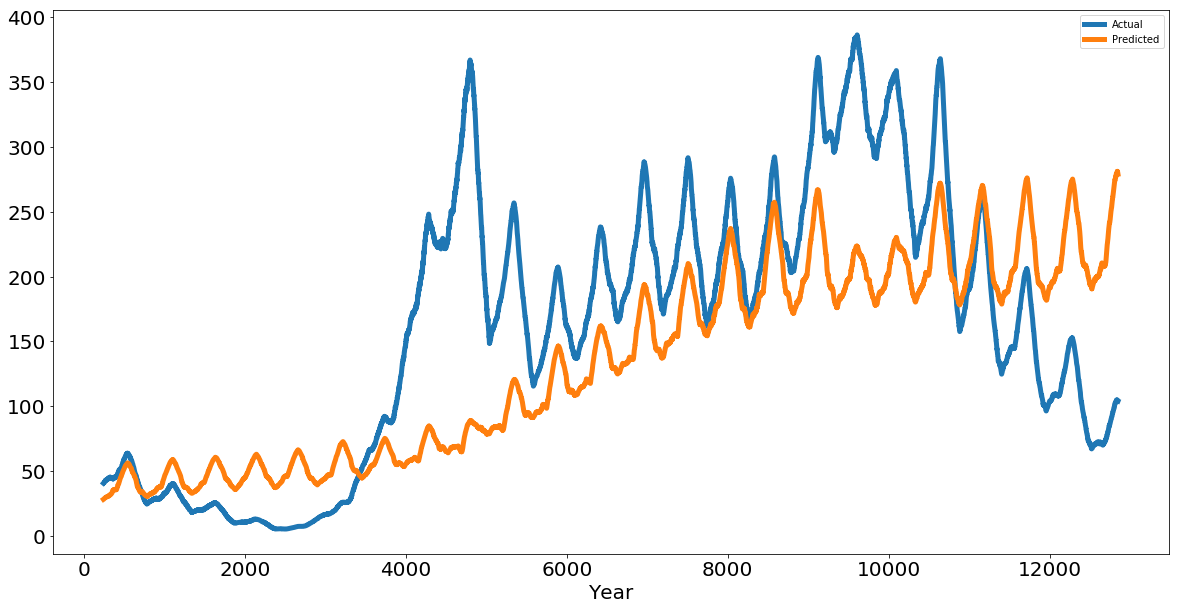

In [100]:
pd.concat([df.Actual.rolling(240).mean(), df.Predicted.rolling(240).mean()], axis=1).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01); ### Test 0.41

gbm.fit(train1,y_train)
preds1 = gbm.predict(X= train1)
print ("MAD Value For Linear Regression: ",MAD_error(invboxcox(y_train),invboxcox(preds1)))

MAD Value For Linear Regression:  17.160678499250036


In [70]:
df1 = pd.DataFrame({'Actual': pd.to_numeric(invboxcox(y_train)), 'Predicted': invboxcox(preds1).flatten()})

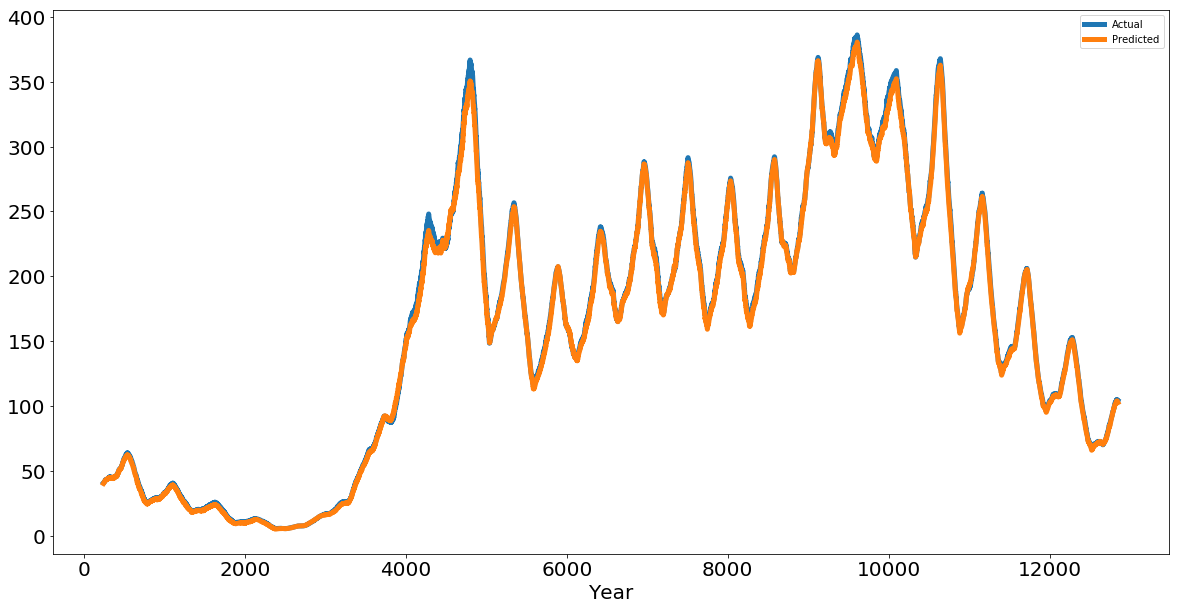

In [71]:
pd.concat([df1.Actual.rolling(240).mean(), df1.Predicted.rolling(240).mean()], axis=1).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [75]:
with open('Rforest_MAD2.csv', 'a+') as f:        
    df1.to_csv( f,header=1)    

In [79]:
train1.head(3)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,0,0,2,0.46,0.4545,0.88,0.2985
1,1,0,1,0,0,1,1,1,0.22,0.1970,0.44,0.3582
2,1,0,1,0,0,2,1,1,0.16,0.1818,0.55,0.1045


In [84]:
y_train.head(2)


0    4.616569
1    2.106253
Name: cnt, dtype: float64

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,0,0,2,0.46,0.4545,0.88,0.2985
1,1,0,1,0,0,1,1,1,0.22,0.1970,0.44,0.3582
2,1,0,1,0,0,2,1,1,0.16,0.1818,0.55,0.1045
3,1,0,1,0,0,6,0,2,0.18,0.1970,0.51,0.1642
4,1,0,1,0,0,0,0,1,0.10,0.0758,0.42,0.3881


In [90]:
# y_test = test1["cnt"]

test1.head()

In [121]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01); ### Test 0.41

gbm.fit(train1,y_train)
preds2 = gbm.predict(X= test1)
print ("MAD Value For Linear Regression: ",MAD_error(invboxcox(y_test),invboxcox(preds2)))

MAD Value For Linear Regression:  28.284544097342618


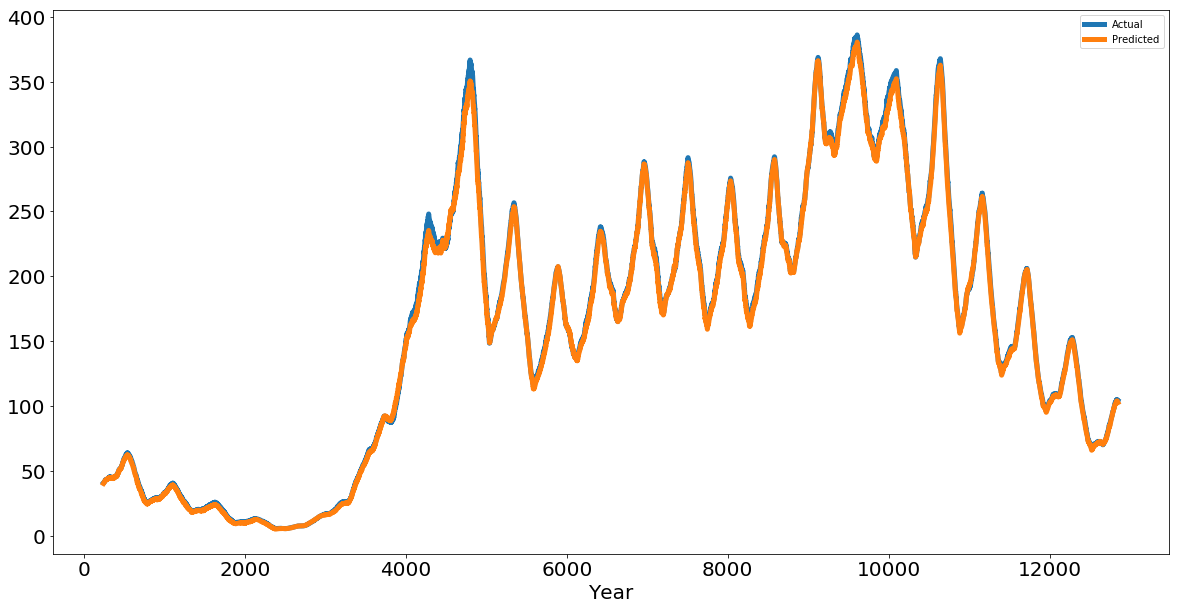

In [106]:
df2 = pd.DataFrame({'Actual': pd.to_numeric(invboxcox(y_test)), 'Predicted': invboxcox(preds2).flatten()})


pd.concat([df1.Actual.rolling(240).mean(), df1.Predicted.rolling(240).mean()], axis=1).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [ ]:
from statsmodels.tsa.holtwinters import Holt

